In [1654]:
from astropy.io import fits 
import matplotlib.pyplot as plt 
import numpy as np 


In [1655]:
data = fits.open("pscreen-512x512x100.fits")

In [1656]:
data.info()

Filename: pscreen-512x512x100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (512, 512, 100)   float32   


In [1657]:
data[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  512 / length of data axis 1                          
NAXIS2  =                  512 / length of data axis 2                          
NAXIS3  =                  100 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [1658]:

phase = fits.open("pscreen-512x512x100.fits")[0].data
#phase *= np.pi/180.0
#plt.figure(figsize=[5,5])
#plt.imshow(phase[50,:,:],origin='lower',cmap='gray')
#plt.colorbar()

In [1659]:
#print(phase.shape)
#print(np.std(phase[50,:,:]))

In [1660]:
#make the aperture:
N = 512 #number of points 
a = 1.0 #total size of the grid, in meters
aperture = np.zeros([N,N]) #array containing the aperture (1 will be where light can enter, zero where it cannot)

x = np.linspace(-a/2.0,a/2.0,N) #x grid
y = np.linspace(-a/2.0,a/2.0,N) #y grid
R = 0.1 #radius of our telescope, this is one m, like SST :) 

#make circular aperture
for i in range(0,N):
    for j in range(0,N):
        if ((x[i]**2.0 + y[j]**2.0)**0.5 <= R):
            aperture[i,j] = 1.0

#plt.imshow(np.real(aperture),origin='lower') #plot the aprerture

In [1661]:
#plt.imshow(np.real(np.exp(1.j*phase[50,:,:])),origin='lower',cmap='gray')
#plt.colorbar()

In [1662]:
aperture = aperture * np.exp(-1.j*phase[0,:,:])
#plt.imshow(np.real(aperture),origin='lower') #plot the aprerture

In [1663]:
#print(aperture.shape)

In [1664]:
# load the image from file
image = fits.open("synth_sun.fits")[0].data
#plt.imshow(image,origin='lower',cmap='magma')

In [1665]:
 # Now, from the (complex) aperture, we calculate the FFT:
aperture_fft = np.fft.fft2(aperture)
PSF = np.abs(aperture_fft)
PSF = PSF**2.0

# we need to rearange this:
PSF = np.fft.fftshift(PSF,axes=(0,1))

#we are only going to be interested in the innermost part of the PSF
N_small = 200
PSF = PSF[N//2-N_small//2:N//2+N_small//2,N//2-N_small//2:N//2+N_small//2]
# we plot psf in the log scale
#plt.imshow(np.log10(PSF[:,:]))

In [1666]:
x_step = a / N #step of the original image
xf = np.linspace(-1.0/(2.0*x_step),1.0/(2.0*x_step), N) #space of spatial frequencies
llambda = 630E-9 # wavelength we are observing at
theta = xf*llambda * 206265 #transform the spatial frequencies to angles
theta = theta[N//2-N_small//2:N//2+N_small//2] #select the appropriate part for the narrowed down PSF
norm = np.amax(PSF) # we want to normalize the psf with respect to maximum first: 
PSF /= norm
#plt.plot(theta,PSF[100]) #plot the middle raw
#plt.xlim([-2,2])
#plt.ylim([0,0.05])

In [1667]:
scale = 48.0/725.0 #in arcsec
grid_interpolate = np.linspace(-31.5,31.5,64)*scale

from scipy import interpolate
f = interpolate.interp2d(theta,theta,PSF)
psf_interpolated = f(grid_interpolate,grid_interpolate)
#plt.imshow(np.log10(psf_interpolated))

In [1668]:
# now finally, convolve
from scipy.signal import convolve2d

# we have to normalize again so that the surface of the psf is one 
psf_interpolated /= np.sum(psf_interpolated)

image_smeared = convolve2d(image,psf_interpolated,mode='same',boundary='symm') 

mean = np.mean(image)
image /= mean
image_smeared /=mean

##convolution messes up with our edges, so we can get rid of them:
#image = image[50:-50,50:-50]
#image_smeared = image_smeared[32:-32,32:-32]

#plt.subplot(121)
#plt.imshow(image,vmin=0.7,vmax=1.3,origin='lower',cmap='magma')
#plt.subplot(122)
#plt.imshow(image_smeared,vmin=0.7,vmax=1.3,origin='lower',cmap='magma')


In [1669]:
print(image.shape)

(512, 512)


In [1670]:
print(np.std(image))
print(np.std(image_smeared))

0.1712641602824972
0.06729156793349447


In [ ]:
#plt.imshow(image_smeared,vmin=0.7,vmax=1.3,origin='lower',cmap='magma')
#plt.savefig('smeared_image.png')

In [ ]:
#image_smeared1=image_smeared

In [ ]:
#image_smared2=image_smeared

In [ ]:
#image_smared3=image_smeared

In [ ]:
image_smared4=image_smeared

In [1672]:
supertrouper=image_smeared1+image_smared2+image_smared3+image_smared4

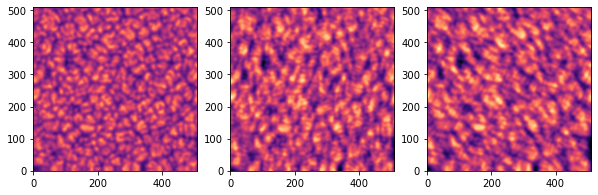

In [1673]:
plt.figure(figsize=[10,10])
plt.subplot(131)
plt.imshow(image_smeared1,vmin=0.7,vmax=1.3,origin='lower',cmap='magma')
plt.subplot(132)
plt.imshow(image_smeared1+image_smared2,origin='lower',cmap='magma')
plt.subplot(133)
plt.imshow(supertrouper,origin='lower',cmap='magma')

In [ ]:
print(np.std(supertrouper))

In [ ]:
fried = fits.open("r0s.fits")

In [ ]:
fried.info()

In [ ]:
test=fried[0].data

In [ ]:
print(test)

In [ ]:
time=np.linspace(0,99,100)
print(time)

In [ ]:
#contrast=np.zeros(100)
#for k in range (0,99):
    #contrast[k]=np.std(np.real(np.exp(1.j*phase[k,:,:])))
   # contrast[k]=np.std(phase[k,:,:])
    #print(np.std(np.real(np.exp(1.j*phase[k,:,:]))))
#contrast[99]= np.std(phase[99,:,:])  
#print(contrast)    
   

In [ ]:
contrast=np.array([0.06729156793349447,
 0.055271166907009006,
 0.05977711506559318,
 0.05720289044723526,
 0.0672716979298003,
 0.05338461878182051,
 0.0570698642050495,
 0.06408828819860779,
 0.05651076944078027,
 0.04496387879332688,
 0.0677434763761521,
 0.03881296819122968,
 0.06671611188882265,
 0.06890277316035466,
 0.054177863537705206,
 0.06729029124076863,
 0.07000453470809916,
 0.06514502464454457,
 0.0559294150363066,
 0.058481970668625066,
 0.05695396522053915,
 0.05581705469108643,
 0.054508580447806224,
 0.054456028856833295,
 0.06426524252788005,
 0.0638068602866102,
 0.06772099490377495,
 0.05988197764022497,
 0.0634340618706727,
 0.07676155792117137,
 0.07322597148848639,
 0.06962539005754734,
 0.06934276202609903,
 0.0715500231864215,
 0.07356612335326422,
 0.07467563147084841,
 0.07935896079280716,
 0.07303985141186108,
 0.07814172239964799,
 0.07365528848575674,
 0.07435418317224543,
 0.07589045235409753,
 0.07085915766248731,
 0.07676521396036774,
 0.07532451092681036,
 0.06389119489627514,
 0.07122365589362464,
 0.07599111368310878,
 0.06407615428538321,
 0.07706701048654085,
 0.065023966028636,
 0.06578830070436487,
 0.06737238489282514,
 0.0749929836433958,
 0.0660536988748705,
 0.06033710692308197,
 0.05026329273395383,
 0.034505575640102495,
 0.050496979824291535,
 0.03681476897198869,
 0.048782035698185476,
 0.04567395808508868,
 0.04452691590269219,
 0.04767105806720626,
 0.036484172152698474,
 0.05917273190402202,
 0.05532213810387485,
 0.0504069501167209,
 0.039646980391655526,
 0.058671783853813664,
 0.05879017147871154,
 0.056194472201484345,
 0.05676769985985065,
 0.057307012651922444,
 0.055941497365811624,
 0.06142011755282213,
 0.055508280929264145,
 0.059238688184537036,
 0.05903768114654984,
 0.05813214780955388,
 0.05857843561266766,
 0.06475080065022554,
 0.0508585138743795,
 0.06583300502360988,
 0.07169701745747968,
 0.06979343682871786,
 0.06507182806866858,
 0.06503098505169244,
 0.05753228797182681,
 0.06180418484879754,
 0.05599400715357586,
 0.06427288934575265,
 0.06529399301033663,
 0.06115267918437757,
 0.06365709600449337,
 0.06386898856064468,
 0.062471331884877926,
 0.0611886175858141,
 0.06094822620606663,
 0.07093892859691882])

In [ ]:
contrast

In [ ]:
print(contrast.shape)

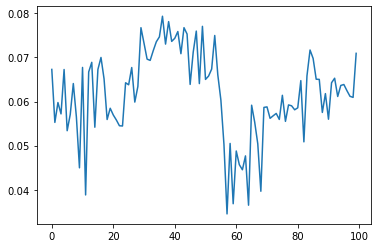

In [1642]:
plt.plot(time,contrast)

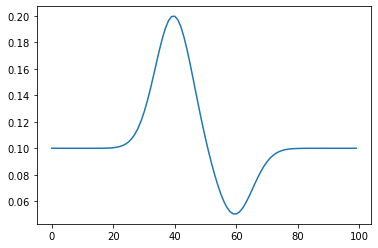

In [1643]:
plt.plot(time,test)

In [1671]:
N = 512 #number of points 
a = 1.0 #total size of the grid, in meters
aperture = np.zeros([N,N]) #array containing the aperture (1 will be where light can enter, zero where it cannot)
x = np.linspace(-a/2.0,a/2.0,N) #x grid
y = np.linspace(-a/2.0,a/2.0,N) #y grid
R = 0.1 #radius of our telescope, this is one m, like SST :) 
#make circular aperture
#image_smeared=np.zeros([512,512])
sumaimagenes=np.zeros([512,512])
for i in range(0,N):
    for j in range(0,N):
        if ((x[i]**2.0 + y[j]**2.0)**0.5 <= R):
            aperture[i,j] = 1.0
apertureo=aperture
for k in range (0,99):
    aperture=apertureo
    aperture = aperture * np.exp(-1.j*phase[k,:,:])
    aperture_fft = np.fft.fft2(aperture)
    PSF = np.abs(aperture_fft)
    PSF = PSF**2.0
    PSF = np.fft.fftshift(PSF,axes=(0,1))
    N_small = 200
    PSF = PSF[N//2-N_small//2:N//2+N_small//2,N//2-N_small//2:N//2+N_small//2]
    scale = 48.0/725.0 #in arcsec
    grid_interpolate = np.linspace(-31.5,31.5,64)*scale

    from scipy import interpolate
    f = interpolate.interp2d(theta,theta,PSF)
    psf_interpolated = f(grid_interpolate,grid_interpolate)
    from scipy.signal import convolve2d
    # we have to normalize again so that the surface of the psf is one 
    psf_interpolated /= np.sum(psf_interpolated)
    image_smeared = convolve2d(image,psf_interpolated,mode='same',boundary='symm') 
    mean = np.mean(image)
    image /= mean
    image_smeared /=mean
    #print(np.std(image))
    print(np.std(image_smeared+sumaimagenes))
    sumaimagenes=image_smeared+sumaimagenes

0.06729156793349447
0.09519400321718148
0.12365729229384849
0.1736067437391503
0.20121577044030903
0.236998515477319
0.24643259606151272
0.27945691026354974
0.31970666512076173
0.35288463533086595
0.40758720470968285
0.4361215933342628
0.46179982337320463
0.5060340177293843
0.55240232033925
0.6046312993801912
0.6550815724489157
0.6675440675181668
0.6996158078859849
0.732453143771378
0.7750981056851847
0.8201152963896521
0.8536727814047327
0.878761831546009
0.9233864515715338
0.9657001258563036
1.020131222461979
1.0580116300851963
1.1079323284147233
1.1210466911607748
1.1810944189633585
1.2373926857108475
1.286803443223209
1.332460888604428
1.3942240211440975
1.4430185765233772
1.4917103221571542
1.529817349989341
1.577989339996121
1.6329945567588222
1.6715592705808104
1.7303793164567054
1.783939017724856
1.8258811602027147
1.890287351803855
1.9437516305729343
1.9782196952761275
2.023045784061397
2.0765444344025603
2.1168921582563316
2.149348863743089
2.2081576826342975
2.24413088578354

In [ ]:
superphase=np.zeros([512,512])



In [1644]:
for k in range (0,99):
    superphase=superphase+phase[k,:,:]
superphase=superphase+phase[99,:,:]    

In [1645]:
print(superphase.shape)

(512, 512)


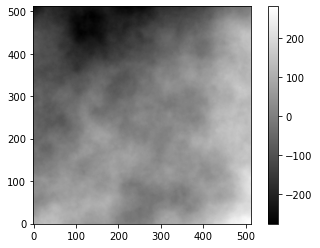

In [1646]:
plt.imshow(superphase,origin='lower',cmap='gray')
plt.colorbar()


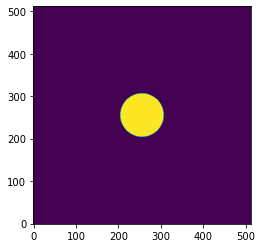

In [1647]:
#make the aperture:
N = 512 #number of points 
a = 1.0 #total size of the grid, in meters
aperture = np.zeros([N,N]) #array containing the aperture (1 will be where light can enter, zero where it cannot)

x = np.linspace(-a/2.0,a/2.0,N) #x grid
y = np.linspace(-a/2.0,a/2.0,N) #y grid
R = 0.1 #radius of our telescope, this is one m, like SST :) 

#make circular aperture
for i in range(0,N):
    for j in range(0,N):
        if ((x[i]**2.0 + y[j]**2.0)**0.5 <= R):
            aperture[i,j] = 1.0

plt.imshow(np.real(aperture),origin='lower') #plot the aprerture


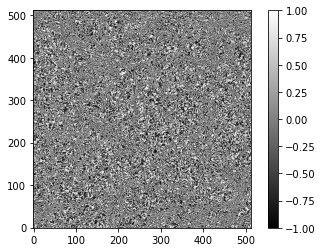

In [1649]:
plt.imshow(np.real(np.exp(1.j*superphase)),origin='lower',cmap='gray')
plt.colorbar()

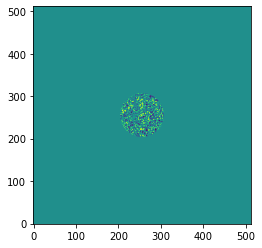

In [1648]:
aperture = aperture * np.exp(-1.j*superphase)
plt.imshow(np.real(aperture),origin='lower') #plot the aprerture



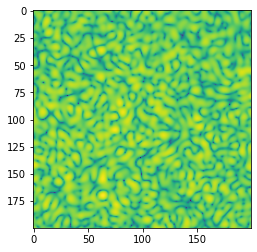

In [1650]:
aperture_fft = np.fft.fft2(aperture)
PSF = np.abs(aperture_fft)
PSF = PSF**2.0

# we need to rearange this:
PSF = np.fft.fftshift(PSF,axes=(0,1))

#we are only going to be interested in the innermost part of the PSF
N_small = 200
PSF = PSF[N//2-N_small//2:N//2+N_small//2,N//2-N_small//2:N//2+N_small//2]
# we plot psf in the log scale
plt.imshow(np.log10(PSF[:,:]))

In [ ]:
x_step = a / N #step of the original image
xf = np.linspace(-1.0/(2.0*x_step),1.0/(2.0*x_step), N) #space of spatial frequencies
llambda = 630E-9 # wavelength we are observing at
theta = xf*llambda * 206265 #transform the spatial frequencies to angles
theta = theta[N//2-N_small//2:N//2+N_small//2] #select the appropriate part for the narrowed down PSF
norm = np.amax(PSF) # we want to normalize the psf with respect to maximum first: 
PSF /= norm
plt.plot(theta,PSF[100]) #plot the middle raw
plt.xlim([-2,2])
plt.ylim([0,0.05])

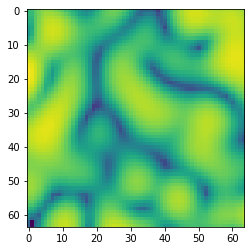

In [1651]:
scale = 48.0/725.0 #in arcsec
grid_interpolate = np.linspace(-31.5,31.5,64)*scale

from scipy import interpolate
f = interpolate.interp2d(theta,theta,PSF)
psf_interpolated = f(grid_interpolate,grid_interpolate)
plt.imshow(np.log10(psf_interpolated))

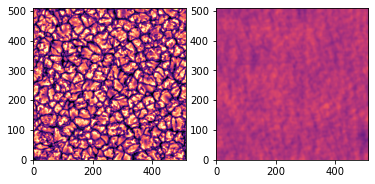

In [1652]:
# now finally, convolve
from scipy.signal import convolve2d

# we have to normalize again so that the surface of the psf is one 
psf_interpolated /= np.sum(psf_interpolated)

image_smeared = convolve2d(image,psf_interpolated,mode='same',boundary='symm') 

mean = np.mean(image)
image /= mean
image_smeared /=mean

##convolution messes up with our edges, so we can get rid of them:
#image = image[50:-50,50:-50]
#image_smeared = image_smeared[32:-32,32:-32]

plt.subplot(121)
plt.imshow(image,vmin=0.7,vmax=1.3,origin='lower',cmap='magma')
plt.subplot(122)
plt.imshow(image_smeared,vmin=0.7,vmax=1.3,origin='lower',cmap='magma')

In [1653]:
print(np.std(image))
print(np.std(image_smeared))

0.1712641602824972
0.022816523357596454
